### 1. NumPy Operations
   - Create an array and perform elementwise operations.
   - Compare loop vs vectorized execution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

lst = [1, 2, 3, 4]
arr = np.array(lst)
arr_sq = arr ** 2
arr_lnr = arr * 0.8 + 7

print(arr)
print(arr_sq)
print(arr_lnr)

[1 2 3 4]
[ 1  4  9 16]
[ 7.8  8.6  9.4 10.2]


In [2]:
rng = np.random.default_rng(42)
arr = rng.normal(50, 10, size=200_000)

def loop_op(a):
    out = np.empty_like(a)
    for i in range(a.shape[0]):
        out[i] = a[i] * 0.8 + 7
    return out

t0 = time.time()
loop_res = loop_op(arr)
t1 = time.time()
vec_res = arr * 0.8 + 7
t2 = time.time()

print("loop:", t1-t0)
print("vectorized:", t2-t1)

loop: 0.13027095794677734
vectorized: 0.0


### 2. Dataset Loading
   - Load provided CSV (`data/starter_data.csv`) using pandas.
   - Inspect with `.info()` and `.head()`.

In [3]:
df = pd.read_csv('data/starter_data.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10 non-null     int64  
 1   region       10 non-null     object 
 2   category     10 non-null     object 
 3   quantity     10 non-null     int64  
 4   price_usd    10 non-null     float64
 5   revenue_usd  10 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 612.0+ bytes


(None,
    id region     category  quantity  price_usd  revenue_usd
 0   1     SE   Industrial      2447      2.891      7075.43
 1   2     MW  Residential      1059      2.631      2786.16
 2   3     SE   Industrial      1573      3.368      5297.66
 3   4     MW  Residential      2884      2.348      6772.75
 4   5     SE  Residential      1309      2.889      3781.64)

### 3. Summary Statistics
   - Calculate `.describe()` for numeric columns.
   - Perform `.groupby()` aggregation by category.

In [4]:
df.describe()

,id,quantity,price_usd,revenue_usd
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,2506.500000,3.017300,7647.242000
std,3.02765,1207.732977,0.359323,4134.148944
min,1.00000,1059.000000,2.348000,2786.160000
25%,3.25000,1599.250000,2.889500,5356.755000
50%,5.50000,2237.000000,2.981000,6688.320000
75%,7.75000,3347.500000,3.288000,9418.655000
max,10.00000,4674.000000,3.528000,16492.200000


In [5]:
summary = df.groupby('category').mean(numeric_only=True).reset_index()
summary

,category,id,quantity,price_usd,revenue_usd
0,Industrial,4.75,2402.500000,3.151500,7459.012500
1,Residential,6.00,2575.833333,2.927833,7772.728333


### 4. Save Outputs
   - Save summary stats to `data/processed/summary.csv` or `.json`.
   - Bonus: Create and save a basic plot.

In [6]:
summary.to_csv('data/processed/summary.csv', index=False)

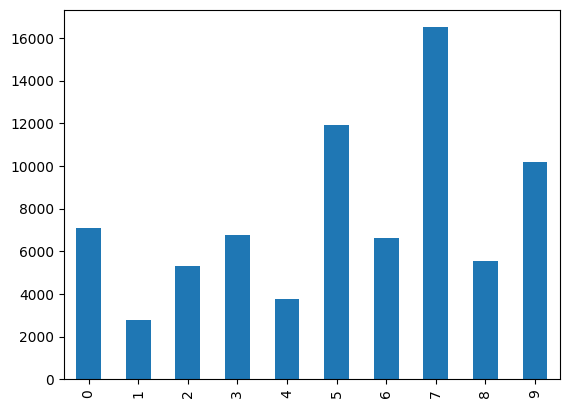

In [7]:
df['revenue_usd'].plot(kind='bar')
plt.savefig('data/processed/bar.png')

### 5. Reusable Functions
   - Write at least one utility function (e.g., `get_summary_stats(df)`).
   - Bonus: Move function to `src/utils.py` and import in notebook.

In [8]:
def get_summary_stats(df):
    
    # Numeric summary
    describe_stats = df.describe(include=[np.number]).to_dict()

    # Groupby aggregation
    by_category = (
        df.groupby("category")
          .agg(
              n_rows=("quantity", "size"),
              avg_price=("price_usd", "mean"),
              total_quantity=("quantity", "sum"),
              total_revenue=("revenue_usd", "sum")
          )
          .reset_index()
          .to_dict(orient="records")
    )

    return {"describe": describe_stats,"by_category": by_category}

In [9]:
from src.utils import get_summary_stats

stats = get_summary_stats(df)
print(stats.keys())

NameError: name 'np' is not defined